In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the CSV file (data.csv) as a DataFrame
ufc_df = pd.read_csv("Resources/data.csv")
ufc_df.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [3]:
# Drop the non-beneficial columns
ufc_df = ufc_df.drop(columns=["B_Location", "R_Location", "Event_ID", "Fight_ID"])
ufc_df.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Alistair Overeem,120.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,Ricardo Lamas,65.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,Urijah Faber,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,Danny Martinez,56.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Tom Watson,84.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [4]:
# Keep only wins and losses (i.e., Red & Blue)

# Display `value_counts()` on `winner` column before modification
print("Before", "-" * 20, ufc_df.winner.value_counts(), "-" * 20, "\n", sep=os.linesep)

ufc_df = ufc_df.loc[(ufc_df.winner == "blue") | (ufc_df.winner == "red")]

# Display results 
print("After", "-" * 20, ufc_df.winner.value_counts(), "-" * 20, sep=os.linesep)


Before
--------------------
red           1327
blue           951
no contest      24
draw            16
Name: winner, dtype: int64
--------------------


After
--------------------
red     1327
blue     951
Name: winner, dtype: int64
--------------------


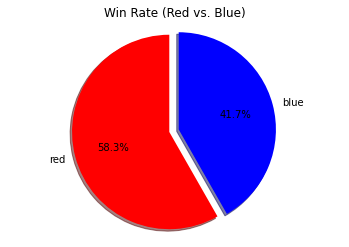

In [5]:
# Pie chart, Red vs. Blue win rate
pie_labels = ufc_df["winner"].value_counts().index
pie_values = ufc_df["winner"].value_counts().values
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()

ax1.pie(
    x=pie_values,
    labels=pie_labels,
    colors=["red", "blue"],
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axes.set_title("Win Rate (Red vs. Blue)")

plt.show()